**PRODIGY INFOTECH**

**TASK 3 - Cats vs Dogs Classification using SVM Vector Machine**

**Soumalya Bhattacharyya - Machine Learning Intern**

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import os
import random
import keras

import warnings
warnings.filterwarnings('ignore')

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

## Extracting Files

In [2]:
import zipfile
with zipfile.ZipFile("../input/dogs-vs-cats/train.zip",'r') as z:
    z.extractall(".")
with zipfile.ZipFile("../input/dogs-vs-cats/test1.zip",'r') as z:
    z.extractall(".")

In [3]:
filenames = os.listdir('/kaggle/working/train')
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(str(1))
    else:
        categories.append(str(0))

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

## Exploratory Data Analysis

In [4]:
df['category'] = df["category"].replace({0: 'cat', 1: 'dog'}) 

In [5]:
df.head() , df.tail()

(       filename category
 0  dog.5604.jpg        1
 1  cat.5974.jpg        0
 2  dog.2996.jpg        1
 3  dog.8290.jpg        1
 4  dog.7336.jpg        1,
             filename category
 24995   cat.8327.jpg        0
 24996  cat.11615.jpg        0
 24997   cat.3551.jpg        0
 24998   dog.7669.jpg        1
 24999    dog.762.jpg        1)

<AxesSubplot:xlabel='category', ylabel='count'>

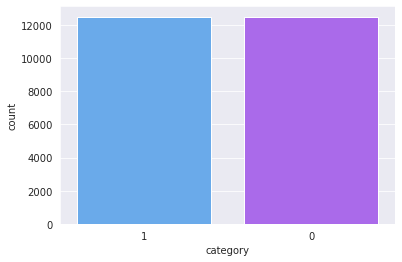

In [6]:
sns.countplot(df['category'], palette='cool')

## Visualizing Data
##### Run this cell again and again, it will randomly show image from our dataset.

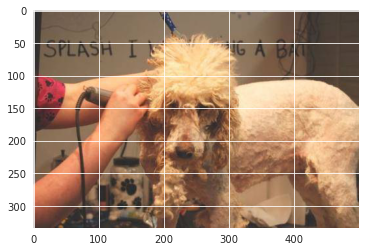

In [7]:
sample = filenames[473]
image = load_img("/kaggle/working/train/"+sample)
plt.imshow(image)

## Splitting of Dataset

In [8]:
train_data, valid_data = train_test_split(df, test_size=0.2, random_state = 42)
train_data = train_data.reset_index(drop=True)
valid_data = valid_data.reset_index(drop=True)

## Generating Training Data

In [9]:
train_data_gen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [10]:
train_generator = train_data_gen.flow_from_dataframe(
    train_data, 
    "/kaggle/working/train/", 
    x_col='filename',
    y_col='category',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=15
)

Found 20000 validated image filenames belonging to 2 classes.


## Generating Validation Data

In [11]:
valid_data_gen = ImageDataGenerator(rescale=1./255)

valid_generator = valid_data_gen.flow_from_dataframe(
    valid_data, 
    "/kaggle/working/train/", 
    x_col='filename',
    y_col='category',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=15
)

Found 5000 validated image filenames belonging to 2 classes.


## *Deep CNN Model*

In [12]:
model = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=(128,128,3)),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),                        
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),                         
                         keras.layers.Dense(units=2, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

##### This will show how our model architecture looks like in the form of an image.

In [14]:
model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

## Callbacks

In [15]:
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=2, verbose=1, factor=0.5, min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

## Model Training

In [16]:
total_train = train_data.shape[0]
total_validate = valid_data.shape[0]
batch_size=15
epochs=30

In [ ]:
history = model.fit(train_generator, epochs=epochs, verbose=1, validation_data=valid_generator,
                   validation_steps=total_validate//batch_size,
                   steps_per_epoch=total_train//batch_size,
                   callbacks=callbacks) 

Epoch 1/30
1333/1333 [==============================] - 154s 112ms/step - loss: 0.6942 - accuracy: 0.5114 - val_loss: 0.6762 - val_accuracy: 0.5688
Epoch 2/30
1333/1333 [==============================] - 146s 110ms/step - loss: 0.6814 - accuracy: 0.5713 - val_loss: 0.6743 - val_accuracy: 0.5950
Epoch 3/30
1333/1333 [==============================] - 145s 109ms/step - loss: 0.6489 - accuracy: 0.6272 - val_loss: 0.5729 - val_accuracy: 0.7009
Epoch 4/30
1333/1333 [==============================] - 144s 108ms/step - loss: 0.6168 - accuracy: 0.6619 - val_loss: 0.5683 - val_accuracy: 0.6945
Epoch 5/30
1333/1333 [==============================] - 144s 108ms/step - loss: 0.5763 - accuracy: 0.6955 - val_loss: 0.5304 - val_accuracy: 0.7387
Epoch 6/30
1333/1333 [==============================] - 145s 109ms/step - loss: 0.5633 - accuracy: 0.7097 - val_loss: 0.5014 - val_accuracy: 0.7582
Epoch 7/30
1333/1333 [==============================] - 143s 108ms/step - loss: 0.5422 - accuracy: 0.7358 - val_

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1333/1333 [==============================] - 144s 108ms/step - loss: 0.5188 - accuracy: 0.7458 - val_loss: 0.4780 - val_accuracy: 0.7656
Epoch 10/30
1333/1333 [==============================] - 146s 109ms/step - loss: 0.5064 - accuracy: 0.7550 - val_loss: 0.4527 - val_accuracy: 0.8008
Epoch 11/30
 789/1333 [================>.............] - ETA: 53s - loss: 0.4872 - accuracy: 0.7693

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1333/1333 [==============================] - 150s 113ms/step - loss: 0.4928 - accuracy: 0.7636 - val_loss: 0.4453 - val_accuracy: 0.7852
Epoch 13/30


## Saving Model

In [ ]:
model.save('cat-vs-dog-model.h5')

## Model Plotting

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

## Model Testing

In [ ]:
nb_samples = valid_data.shape[0]
predict = model.predict(valid_generator, steps=np.ceil(nb_samples/batch_size))

In [ ]:
valid_data['category'] = np.argmax(predict, axis=-1)
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
valid_data['category'] = valid_data['category'].replace(label_map)
valid_data['category'] = valid_data['category'].replace({ 'dog': 1, 'cat': 0 })

In [ ]:
# make a prediction for a new image.

sample = filenames[60]
image = load_img("/kaggle/working/train/"+sample, target_size=(128,128))

img = img_to_array(image)
img = img.reshape(1, 128, 128, 3)
img = img.astype('float32')

result = model.predict(img)
result = np.argmax(result, axis=-1)

if result == 0:
    print("It's a Cat.")
else:
    print("It's a Dog.")
    
plt.imshow(image)